<a href="https://colab.research.google.com/github/cuongtm2/machine-learning/blob/master/TF_training_Day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LUYỆN TẬP THỰC HÀNH TENSORFLOW**

[DAY 2] TEXT AND IMAGE PROCESSING

In [1]:
!pip install tensorflow==2.7.0
!pip install tensorflow-datasets==4.4.0 
!pip install Pillow==8.4.0 
!pip install pandas==1.3.4 
!pip install numpy==1.21.4 
!pip install scipy==1.7.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 665.5 MB 109.4 MB/s
     |████████████████████████████████| 463 kB 5.4 MB/s 
     |████████████████████████████████| 1.3 MB 55.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636
Looking in indexes: ht

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.3 MB 5.5 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.7 MB 140 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import urllib
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [4]:
tf.__version__

'2.7.0'

1. Image classification

Bộ dữ liệu Người hay ngựa (Horse or human) được tải về sẵn như dưới

In [ ]:
_TRAIN_URL = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
_TEST_URL = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"
urllib.request.urlretrieve(_TRAIN_URL, 'horse-or-human.zip')
local_zip = 'horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/horse-or-human/')
zip_ref.close()
urllib.request.urlretrieve(_TEST_URL, 'testdata.zip')
local_zip = 'testdata.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/testdata/')
zip_ref.close()

Dữ liệu ảnh Người - ngựa đã được lưu vào các thư mục: dir_train, dir_test.
Hãy load dữ liệu này thành dataset và huấn luyện một mô hình phân loại người - ngựa


In [ ]:
dir_train = 'tmp/horse-or-human/'
dir_test = 'tmp/testdata/'



In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7, preprocess_input

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                   horizontal_flip=True, 
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=dir_train, 
                                                    target_size=(224,224),
                                                    class_mode='binary',
                                                    batch_size=32,
                                                    shuffle=True)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = train_datagen.flow_from_directory(directory=dir_test,
                                                  target_size=(224,224), 
                                                  class_mode='binary', 
                                                  batch_size=32,
                                                  shuffle=True)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
efn = EfficientNetB7(weights="imagenet", 
                     include_top = False, 
                     input_shape = (224,224,3))
for layer in efn.layers:
    layer.trainable = False

model = tf.keras.Sequential()
model.add(efn)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb7 (Functional)  (None, 7, 7, 2560)        64097687  
_________________________________________________________________
flatten_3 (Flatten)          (None, 125440)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 125441    
Total params: 64,223,128
Trainable params: 125,441
Non-trainable params: 64,097,687
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", 
              loss="binary_crossentropy", 
              metrics ="accuracy")

In [ ]:
patient = 4
save_path = '/content/drive/MyDrive/tf_certification/model3.h5'
callbacks_list = [
    EarlyStopping(
        monitor='val_loss', 
        patience=patient, 
        mode='min', 
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor = 'val_loss', 
        factor = 0.5, 
        patience = patient / 2, 
        min_lr=1e-6,
        verbose=1,
        mode='min'
    ),
    ModelCheckpoint(save_path, 
                    monitor="val_accuracy",
                    mode="max",
                    verbose=1,
                    save_best_only=True)
    ]


In [ ]:
history = model.fit(train_generator,
                    batch_size=32,
                    epochs=50,
                    validation_data=val_generator,
                    callbacks=callbacks_list)

Epoch 1/50
33/33 [==============================] - ETA: 0s - loss: 0.1859 - accuracy: 0.9640
Epoch 00001: val_accuracy improved from -inf to 0.99609, saving model to /content/drive/MyDrive/tf_certification/model3.h5
33/33 [==============================] - 33s 993ms/step - loss: 0.1859 - accuracy: 0.9640 - val_loss: 0.0997 - val_accuracy: 0.9961
Epoch 2/50
33/33 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9981
Epoch 00002: val_accuracy improved from 0.99609 to 1.00000, saving model to /content/drive/MyDrive/tf_certification/model3.h5
33/33 [==============================] - 26s 797ms/step - loss: 0.0143 - accuracy: 0.9981 - val_loss: 6.8280e-04 - val_accuracy: 1.0000
Epoch 3/50
33/33 [==============================] - ETA: 0s - loss: 0.0206 - accuracy: 0.9981
Epoch 00003: val_accuracy did not improve from 1.00000
33/33 [==============================] - 23s 709ms/step - loss: 0.0206 - accuracy: 0.9981 - val_loss: 1.6568e-05 - val_accuracy: 1.0000
Epoch 4/50

2. Text classification

Bộ dữ liệu Sarcasm được tải về như dưới, hãy xử lý huấn luyện một mô hình phân loại văn bản là mỉa mai hay không.

In [5]:
import json
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/sarcasm.json'
urllib.request.urlretrieve(url, 'sarcasm.json')

# DO NOT CHANGE THIS CODE OR THE TESTS MAY NOT WORK
vocab_size = 10000 #1000
embedding_dim = 160 #16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

sentences = []
labels = []

# YOUR CODE HERE
with open('sarcasm.json', 'r') as f:
    data = json.load(f)

for d in data:
    sentences.append(d['headline'])
    labels.append(d['is_sarcastic'])


In [6]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/sarcasm.json'
urllib.request.urlretrieve(url, 'sarcasm.json')

# DO NOT CHANGE THIS CODE OR THE TESTS MAY NOT WORK
vocab_size = 1000 #1000
embedding_dim = 16 #16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

sentences = []
labels = []

# YOUR CODE HERE
with open('sarcasm.json', 'r') as f:
    data = json.load(f)

for d in data:
    sentences.append(d['headline'])
    labels.append(d['is_sarcastic'])


In [ ]:
len(data)

26709

In [ ]:
# training_size = int(len(data)*0.2)
# train_sentences = sentences[:training_size]
# train_labels = labels[:training_size]
# validation_sentences = sentences[training_size:]
# validation_labels = labels[training_size:]

# # 데이터셋은 numpy array이어야 한다.
# train_labels = np.array(train_labels)
# validation_labels = np.array(validation_labels)

In [7]:
y = np.array(labels)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(sentences, y, test_size=0.20, random_state=42)

In [9]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_to_idx = tokenizer.word_index

In [10]:
train_sequences = tokenizer.texts_to_sequences(X_train)
validation_sequences = tokenizer.texts_to_sequences(X_val)

In [11]:
train_padded = pad_sequences(train_sequences, truncating=trunc_type, padding=padding_type, maxlen=max_length)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           16000     
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 24)                1560      
                                                                 
 dropout_2 (Dropout)         (None, 24)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
__________________________________________________

In [18]:
patient = 4
save_path = '/content/drive/MyDrive/tf_certification/model4_base.h5' # '/content/drive/MyDrive/tf_certification/model4.h5'
callbacks_list = [
    EarlyStopping(
        monitor='val_loss', 
        patience=patient, 
        mode='min', 
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor = 'val_loss', 
        factor = 0.5, 
        patience = patient / 2, 
        min_lr=1e-6,
        verbose=1,
        mode='min'
    ),
    ModelCheckpoint(save_path, 
                    monitor="val_accuracy",
                    mode="max",
                    verbose=1,
                    save_best_only=True)
    ]
history = model.fit(x= train_padded, y =y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(validation_padded, y_val),
                    callbacks=callbacks_list)

Epoch 1/50
668/668 [==============================] - ETA: 0s - loss: 0.2754 - accuracy: 0.8819
Epoch 00001: val_accuracy improved from -inf to 0.83770, saving model to /content/drive/MyDrive/tf_certification/model4_base.h5
668/668 [==============================] - 9s 13ms/step - loss: 0.2754 - accuracy: 0.8819 - val_loss: 0.3917 - val_accuracy: 0.8377 - lr: 2.5000e-04
Epoch 2/50
668/668 [==============================] - ETA: 0s - loss: 0.2731 - accuracy: 0.8839
Epoch 00002: val_accuracy did not improve from 0.83770
668/668 [==============================] - 8s 13ms/step - loss: 0.2731 - accuracy: 0.8839 - val_loss: 0.4034 - val_accuracy: 0.8366 - lr: 2.5000e-04
Epoch 3/50
668/668 [==============================] - ETA: 0s - loss: 0.2688 - accuracy: 0.8859
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00003: val_accuracy improved from 0.83770 to 0.83789, saving model to /content/drive/MyDrive/tf_certification/model4_base.h5
668/668 [==========

In [19]:
model1 = tf.keras.models.load_model(save_path)
score = model1.evaluate(validation_padded, y_val, verbose=1)

167/167 [==============================] - 3s 10ms/step - loss: 0.4075 - accuracy: 0.8379


In [ ]:
patient = 4
save_path = '/content/drive/MyDrive/tf_certification/model4_10k_160.h5' # '/content/drive/MyDrive/tf_certification/model4.h5'
callbacks_list = [
    EarlyStopping(
        monitor='val_loss', 
        patience=patient, 
        mode='min', 
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor = 'val_loss', 
        factor = 0.5, 
        patience = patient / 2, 
        min_lr=1e-6,
        verbose=1,
        mode='min'
    ),
    ModelCheckpoint(save_path, 
                    monitor="val_accuracy",
                    mode="max",
                    verbose=1,
                    save_best_only=True)
    ]


In [ ]:
train_padded.shape , y_train.shape, validation_padded.shape,y_val.shape

((21367, 120), (21367,), (5342, 120), (5342,))

In [ ]:
history = model.fit(x= train_padded, y =y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(validation_padded, y_val),
                    callbacks=callbacks_list)

Epoch 1/50
667/668 [============================>.] - ETA: 0s - loss: 0.4837 - accuracy: 0.7569
Epoch 00001: val_accuracy improved from -inf to 0.82216, saving model to /content/drive/MyDrive/tf_certification/model4.h5
668/668 [==============================] - 9s 13ms/step - loss: 0.4837 - accuracy: 0.7570 - val_loss: 0.3792 - val_accuracy: 0.8222
Epoch 2/50
667/668 [============================>.] - ETA: 0s - loss: 0.3681 - accuracy: 0.8363
Epoch 00002: val_accuracy improved from 0.82216 to 0.83620, saving model to /content/drive/MyDrive/tf_certification/model4.h5
668/668 [==============================] - 8s 12ms/step - loss: 0.3681 - accuracy: 0.8362 - val_loss: 0.3690 - val_accuracy: 0.8362
Epoch 3/50
667/668 [============================>.] - ETA: 0s - loss: 0.3366 - accuracy: 0.8515
Epoch 00003: val_accuracy did not improve from 0.83620
668/668 [==============================] - 12s 18ms/step - loss: 0.3366 - accuracy: 0.8515 - val_loss: 0.3695 - val_accuracy: 0.8353
Epoch 4/50


In [ ]:
vocab_size = 10000

In [ ]:
patient = 4
save_path = '/content/drive/MyDrive/tf_certification/model4_1.h5'
callbacks_list = [
    EarlyStopping(
        monitor='val_loss', 
        patience=patient, 
        mode='min', 
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor = 'val_loss', 
        factor = 0.5, 
        patience = patient / 2, 
        min_lr=1e-6,
        verbose=1,
        mode='min'
    ),
    ModelCheckpoint(save_path, 
                    monitor="val_accuracy",
                    mode="max",
                    verbose=1,
                    save_best_only=True)
    ]


In [ ]:
history = model.fit(x= train_padded, y =y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(validation_padded, y_val),
                    callbacks=callbacks_list)

Epoch 1/50
666/668 [============================>.] - ETA: 0s - loss: 0.4575 - accuracy: 0.7841
Epoch 00001: val_accuracy improved from -inf to 0.85548, saving model to /content/drive/MyDrive/tf_certification/model4_1.h5
668/668 [==============================] - 10s 16ms/step - loss: 0.4574 - accuracy: 0.7842 - val_loss: 0.3297 - val_accuracy: 0.8555
Epoch 2/50
668/668 [==============================] - ETA: 0s - loss: 0.2550 - accuracy: 0.9034
Epoch 00002: val_accuracy improved from 0.85548 to 0.86148, saving model to /content/drive/MyDrive/tf_certification/model4_1.h5
668/668 [==============================] - 9s 14ms/step - loss: 0.2550 - accuracy: 0.9034 - val_loss: 0.3297 - val_accuracy: 0.8615
Epoch 3/50
668/668 [==============================] - ETA: 0s - loss: 0.1852 - accuracy: 0.9351
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00003: val_accuracy did not improve from 0.86148
668/668 [==============================] - 9s 13ms/step - 

In [ ]:
# 10k + 160
history = model.fit(x= train_padded, y =y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(validation_padded, y_val),
                    callbacks=callbacks_list)

Epoch 1/50
668/668 [==============================] - ETA: 0s - loss: 0.4088 - accuracy: 0.8133
Epoch 00001: val_accuracy improved from -inf to 0.86503, saving model to /content/drive/MyDrive/tf_certification/model4_10k_160.h5
668/668 [==============================] - 88s 126ms/step - loss: 0.4088 - accuracy: 0.8133 - val_loss: 0.3129 - val_accuracy: 0.8650 - lr: 0.0010
Epoch 2/50
668/668 [==============================] - ETA: 0s - loss: 0.2106 - accuracy: 0.9192
Epoch 00002: val_accuracy improved from 0.86503 to 0.86952, saving model to /content/drive/MyDrive/tf_certification/model4_10k_160.h5
668/668 [==============================] - 84s 126ms/step - loss: 0.2106 - accuracy: 0.9192 - val_loss: 0.3367 - val_accuracy: 0.8695 - lr: 0.0010
Epoch 3/50
668/668 [==============================] - ETA: 0s - loss: 0.1183 - accuracy: 0.9572
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00003: val_accuracy did not improve from 0.86952
668/668 [========

## Bert

In [ ]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 665.5 MB 125.8 MB/s
     |████████████████████████████████| 463 kB 5.0 MB/s 
     |████████████████████████████████| 1.3 MB 60.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0+zzzcolab20220506162203
    Uninstalling tensorflow-2.8.0+zzzcolab20220506162203:
      Successfully uninstalled tensorflow-2.8.0+zzzcolab20220506162203


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 4.9 MB/s 
     |████████████████████████████████| 86 kB 4.3 MB/s 
     |████████████████████████████████| 6.6 MB 43.3 MB/s 
     |████████████████████████████████| 596 kB 48.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import urllib
import zipfile
import json
import os
import re
import nltk
from nltk.corpus import stopwords
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3
import matplotlib.pyplot as plt
from transformers import TFBertModel, BertTokenizer

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
# Tokenizing all the sentences using pre-trained BERT model from Tranformers
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME,do_lower_case = True)

def encoder(sentences):
  ids = []
  for sentence in sentences:
    encoding = tokenizer.encode_plus(
    sentence,
    max_length=16,
    truncation = True,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=False)
    ids.append(encoding['input_ids'])
  return ids

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/sarcasm.json'
urllib.request.urlretrieve(url, 'sarcasm.json')

# DO NOT CHANGE THIS CODE OR THE TESTS MAY NOT WORK
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

sentences = []
labels = []

# YOUR CODE HERE
with open('sarcasm.json', 'r') as f:
    data = json.load(f)

for d in data:
    sentences.append(d['headline'])
    labels.append(d['is_sarcastic'])


In [ ]:

#Train test split
train_sents,test_sents, train_labels, test_labels  = train_test_split(sentences,labels,test_size=0.2)

train_ids = encoder(train_sents)
test_ids = encoder(test_sents) 

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
# Converting arrays to tensors
train_ids = tf.convert_to_tensor(train_ids)
test_ids = tf.convert_to_tensor(test_ids)
test_labels = tf.convert_to_tensor(test_labels)
train_labels = tf.convert_to_tensor(train_labels)

In [ ]:
# Building Model from transformers using pre-trained bert-base-uncased (12-layer, 768-hidden, 12-heads, 110M parameters.)
bert_encoder = TFBertModel.from_pretrained('bert-base-uncased')
input_word_ids = tf.keras.Input(shape=(16,), dtype=tf.int32, name="input_word_ids")  
embedding = bert_encoder([input_word_ids])
dense = tf.keras.layers.Lambda(lambda seq: seq[:, 0, :])(embedding[0])
dense = tf.keras.layers.Dense(128, activation='relu')(dense)
dense = tf.keras.layers.Dropout(0.2)(dense)   
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)    

model = tf.keras.Model(inputs=[input_word_ids], outputs=output)  

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model.compile(tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 16)]             0         
                                                                 
 tf_bert_model (TFBertModel)  TFBaseModelOutputWithPoo  109482240
                             lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             16, 768),                           
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                             

In [ ]:
patient = 4
save_path = '/content/drive/MyDrive/tf_certification/model4_bert.h5'
callbacks_list = [
    EarlyStopping(
        monitor='val_loss', 
        patience=patient, 
        mode='min', 
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor = 'val_loss', 
        factor = 0.5, 
        patience = patient / 2, 
        min_lr=1e-7,
        verbose=1,
        mode='min'
    ),
    ModelCheckpoint(save_path, 
                    monitor="val_accuracy",
                    mode="max",
                    verbose=1,
                    save_best_only=True)
    ]

In [ ]:
history = model.fit(x = train_ids, y = train_labels, epochs = 30, verbose = 1, batch_size = 32, validation_data = (test_ids, test_labels), callbacks=callbacks_list)

Epoch 1/30
668/668 [==============================] - ETA: 0s - loss: 0.2096 - accuracy: 0.9175
Epoch 00001: val_accuracy improved from -inf to 0.91913, saving model to /content/drive/MyDrive/tf_certification/model4_bert.h5
668/668 [==============================] - 108s 161ms/step - loss: 0.2096 - accuracy: 0.9175 - val_loss: 0.1981 - val_accuracy: 0.9191 - lr: 1.0000e-05
Epoch 2/30
668/668 [==============================] - ETA: 0s - loss: 0.1264 - accuracy: 0.9542
Epoch 00002: val_accuracy improved from 0.91913 to 0.92419, saving model to /content/drive/MyDrive/tf_certification/model4_bert.h5
668/668 [==============================] - 114s 170ms/step - loss: 0.1264 - accuracy: 0.9542 - val_loss: 0.1895 - val_accuracy: 0.9242 - lr: 1.0000e-05
Epoch 3/30
668/668 [==============================] - ETA: 0s - loss: 0.0704 - accuracy: 0.9760
Epoch 00003: val_accuracy improved from 0.92419 to 0.92681, saving model to /content/drive/MyDrive/tf_certification/model4_bert.h5
668/668 [=========

In [ ]:
model1=tf.keras.models.load_model(save_path)
score = model.evaluate(test_ids, test_labels, verbose=1)

NameError: ignored

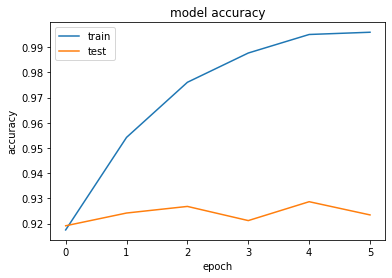

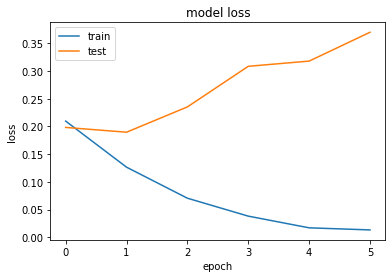

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Bert 2

In [ ]:
# Building Model from transformers using pre-trained bert-base-uncased (12-layer, 768-hidden, 12-heads, 110M parameters.)
bert_encoder = TFBertModel.from_pretrained('bert-base-uncased')
# for layer in bert_encoder.layers:
#     layer.trainable = False
input_word_ids = tf.keras.Input(shape=(16,), dtype=tf.int32, name="input_word_ids")
sequence_output = bert_encoder(input_word_ids)[0]
cls_token = sequence_output[:, 0, :]
dense = Dense(128, activation='relu')(cls_token)
dense = tf.keras.layers.Dropout(0.2)(dense)   
output = Dense(1, activation='sigmoid')(dense)
model = tf.keras.Model(inputs=[input_word_ids], outputs=output)
model.compile(tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 16)]             0         
                                                                 
 tf_bert_model_1 (TFBertMode  TFBaseModelOutputWithPoo  109482240
 l)                          lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             16, 768),                           
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                             

In [ ]:
patient = 4
save_path = '/content/drive/MyDrive/tf_certification/model4_bert_2.h5'
callbacks_list = [
    EarlyStopping(
        monitor='val_loss', 
        patience=patient, 
        mode='min', 
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor = 'val_loss', 
        factor = 0.5, 
        patience = patient / 2, 
        min_lr=1e-7,
        verbose=1,
        mode='min'
    ),
    ModelCheckpoint(save_path, 
                    monitor="val_accuracy",
                    mode="max",
                    verbose=1,
                    save_best_only=True)
    ]

In [ ]:
history = model.fit(x = train_ids, y = train_labels, epochs = 15, verbose = 1, batch_size = 32, validation_data = (test_ids, test_labels), callbacks=callbacks_list)

Epoch 1/15
668/668 [==============================] - ETA: 0s - loss: 0.3098 - accuracy: 0.8660
Epoch 00001: val_accuracy improved from -inf to 0.90584, saving model to /content/drive/MyDrive/tf_certification/model4_bert_2.h5
668/668 [==============================] - 120s 159ms/step - loss: 0.3098 - accuracy: 0.8660 - val_loss: 0.2347 - val_accuracy: 0.9058 - lr: 1.0000e-05
Epoch 2/15
668/668 [==============================] - ETA: 0s - loss: 0.1609 - accuracy: 0.9373
Epoch 00002: val_accuracy improved from 0.90584 to 0.91539, saving model to /content/drive/MyDrive/tf_certification/model4_bert_2.h5
668/668 [==============================] - 110s 164ms/step - loss: 0.1609 - accuracy: 0.9373 - val_loss: 0.2168 - val_accuracy: 0.9154 - lr: 1.0000e-05
Epoch 3/15
668/668 [==============================] - ETA: 0s - loss: 0.0938 - accuracy: 0.9659
Epoch 00003: val_accuracy improved from 0.91539 to 0.92138, saving model to /content/drive/MyDrive/tf_certification/model4_bert_2.h5
668/668 [===

In [ ]:
save_path

'/content/drive/MyDrive/tf_certification/model4_bert_2.h5'

'/content/drive/MyDrive/tf_certification/model4_bert_2.h5'

In [ ]:
model

In [ ]:
model1=tf.keras.models.load_model(save_path, custom_objects={"CustomModel": model})
score = model1.evaluate(test_ids, test_labels, verbose=1)

ValueError: ignored

In [ ]:
model1=model.load_weights(save_path)
score = model1.evaluate(test_ids, test_labels, verbose=1)

AttributeError: ignored

## Bye Bert

In [ ]:
import json, re, random, urllib, string
import numpy as np
import tensorflow as tf

In [ ]:
url = 'https://storage.googleapis.com/download.tensorflow.org/data/sarcasm.json'
urllib.request.urlretrieve(url, 'sarcasm.json')

# DO NOT CHANGE THIS CODE OR THE TESTS MAY NOT WORK
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

sentences = []
labels = []

# YOUR CODE HERE
with open('sarcasm.json', 'r') as f:
    data = json.load(f)

for d in data:
    sentences.append(d['headline'])
    labels.append(d['is_sarcastic'])


In [ ]:
! mkdir sarcasm/

! mkdir sarcasm/train
! mkdir sarcasm/test

! mkdir sarcasm/train/not_sarcastic
! mkdir sarcasm/train/sarcastic
! mkdir sarcasm/test/sarcastic
! mkdir sarcasm/test/not_sarcastic

In [ ]:
# get id of each class
label_1_ids = []
label_0_ids = []
for i, x in enumerate(labels):
    if x == 1:
        label_1_ids.append(i)

    else:
        label_0_ids.append(i)

random.shuffle(label_0_ids)
random.shuffle(label_1_ids)

# split train - test
num_train_l0 = int(0.8*len(label_0_ids))
num_train_l1 = int(0.8*len(label_1_ids))

for i, id in enumerate(label_0_ids):
    text = sentences[id]    
    f = None
    if i <= num_train_l0:
        f = open(f"sarcasm/train/not_sarcastic/{id}.txt", "w")
    else:
        f = open(f"sarcasm/test/not_sarcastic/{id}.txt", "w")
    f.write(text)
    f.close()
    
for i, id in enumerate(label_1_ids):
    text = sentences[id]    
    f = None
    if i <= num_train_l1:
        f = open(f"sarcasm/train/sarcastic/{id}.txt", "w")
    else:
        f = open(f"sarcasm/test/sarcastic/{id}.txt", "w")
    f.write(text)
    f.close()
    
print("num not sarcastic: ", len(label_0_ids), " - train: ", num_train_l0)
print("num sarcastic: ", len(label_1_ids), " - train: ", num_train_l1)

num not sarcastic:  14985  - train:  11988
num sarcastic:  11724  - train:  9379


In [ ]:
batch_size = 32
# seed = 42

raw_train = tf.keras.utils.text_dataset_from_directory(
    'sarcasm/train', 
    batch_size=batch_size 
    )

raw_test = tf.keras.utils.text_dataset_from_directory(
    'sarcasm/test', 
    # batch_size=batch_size 
    )


Found 21369 files belonging to 2 classes.
Found 5340 files belonging to 2 classes.


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 32
train_dataset = raw_train.prefetch(tf.data.AUTOTUNE)
test_dataset = raw_test.prefetch(tf.data.AUTOTUNE)

In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
def model_BiLSTM():
    model = tf.keras.Sequential([
        encoder,
        tf.keras.layers.Embedding(
            input_dim=len(encoder.get_vocabulary()),
            output_dim=64,
            # Use masking to handle the variable sequence lengths
            mask_zero=True),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(1e-4),
                metrics=['accuracy'])
    return model


In [ ]:
model = model_BiLSTM()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 138,369
Trainable params: 138,369
Non-trai

In [ ]:
patient = 4
save_path = '/content/drive/MyDrive/tf_certification/model4_no_bert.h5'
callbacks_list = [
    EarlyStopping(
        monitor='val_loss', 
        patience=patient, 
        mode='min', 
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor = 'val_loss', 
        factor = 0.5, 
        patience = patient / 2, 
        min_lr=1e-6,
        verbose=1,
        mode='min'
    )
    ]

In [ ]:
history = model.fit(train_dataset, epochs = 10, verbose = 1, batch_size = 32, validation_data = test_dataset, callbacks=callbacks_list)

Epoch 1/10
668/668 [==============================] - 16s 23ms/step - loss: 0.3912 - accuracy: 0.7998 - val_loss: 0.4000 - val_accuracy: 0.7974 - lr: 1.0000e-04
Epoch 2/10
668/668 [==============================] - 15s 23ms/step - loss: 0.3592 - accuracy: 0.8243 - val_loss: 0.3908 - val_accuracy: 0.8169 - lr: 1.0000e-04
Epoch 3/10
668/668 [==============================] - 16s 23ms/step - loss: 0.3452 - accuracy: 0.8362 - val_loss: 0.3903 - val_accuracy: 0.8199 - lr: 1.0000e-04
Epoch 4/10
668/668 [==============================] - 16s 23ms/step - loss: 0.3382 - accuracy: 0.8396 - val_loss: 0.3911 - val_accuracy: 0.8272 - lr: 1.0000e-04
Epoch 5/10
668/668 [==============================] - 16s 23ms/step - loss: 0.3313 - accuracy: 0.8448 - val_loss: 0.3875 - val_accuracy: 0.8285 - lr: 1.0000e-04
Epoch 6/10
668/668 [==============================] - 16s 23ms/step - loss: 0.3266 - accuracy: 0.8482 - val_loss: 0.3862 - val_accuracy: 0.8288 - lr: 1.0000e-04
Epoch 7/10
668/668 [==============

In [ ]:
model.save('/content/drive/MyDrive/tf_certification/model4_test', save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/tf_certification/model4_test/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/tf_certification/model4_test/assets


In [ ]:
model.save('/content/drive/MyDrive/tf_certification/model4_test', save_format='tf')

## word2vec